In [1]:
from datascience import *
import numpy as np
from path_data_variable import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [2]:
# Read two books, fast (again)!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [3]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [4]:
chars_periods_huck_finn

Huck Finn Chapter Length | Number of Periods
7026                     | 66
11982                    | 117
8529                     | 72
6799                     | 84
8166                     | 91
14550                    | 125
13218                    | 127
22208                    | 249
8081                     | 71
7036                     | 70
... (33 rows omitted)

In [5]:
chars_periods_little_women

Little Women Chapter Length | Number of Periods
21759                       | 189
22148                       | 188
20558                       | 231
25526                       | 195
23395                       | 255
14622                       | 140
14431                       | 131
22476                       | 214
33767                       | 337
18508                       | 185
... (37 rows omitted)

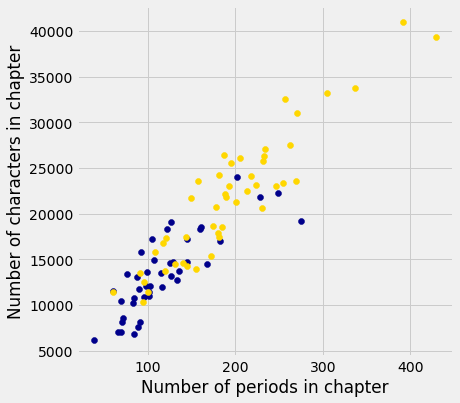

In [6]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');